In [1]:
import pandas as pd

# Load dataset
file_path = 'E:\Sems 7\SisRek/Tempat-Wisata-Toba-Preprocessing.csv'
data = pd.read_csv(file_path)

# Tampilkan 5 baris pertama dataset
data.head()

,Unnamed: 0.1,Unnamed: 0,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews
0,0,0,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.126030e+20,5.0,NaN
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
2,2,2,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.078860e+20,5.0,NaN
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('E:\Sems 7\SisRek/Tempat-Wisata-Toba-Preprocessing.csv')

# Split into train, validation, test (70%, 15%, 15%)
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

#### User profile dan Item profile.

In [3]:
import numpy as np
import pandas as pd

# Contoh data test
test_data = pd.DataFrame({
    'ReviewerId': [1, 1, 2, 2],
    'PlaceID': [0, 1, 2, 3],
    'Rating': [5, 3, 4, 2]
})

# Normalized item features
normalized_item_features = pd.DataFrame({
    0: [0.1, 0.2, 0.3, 0.4],
    1: [0.5, 0.6, 0.7, 0.8],
    2: [0.9, 0.1, 0.2, 0.3],
    3: [0.4, 0.5, 0.6, 0.7]
}).T

# Step 1: Membuat item profiles
place_id_to_features = {i: normalized_item_features.loc[i].values for i in normalized_item_features.index}

# Step 2: Membuat user profiles
user_profiles = {}

for user_id in test_data['ReviewerId'].unique():
    user_data = test_data[test_data['ReviewerId'] == user_id]
    user_profile = np.zeros(normalized_item_features.shape[1])

    for place_id, rating in zip(user_data['PlaceID'], user_data['Rating']):
        if place_id in place_id_to_features:
            user_profile += rating * place_id_to_features[place_id]

    # Normalize the user profile vector
    if np.linalg.norm(user_profile) > 0:
        user_profile /= np.linalg.norm(user_profile)

    user_profiles[user_id] = user_profile

# Output item profiles
print("Item Profiles (Normalized Features):")
for place_id, features in place_id_to_features.items():
    print(f"PlaceID {place_id}: {features}")

# Output user profiles
print("\nUser Profiles:")
for user_id, profile in user_profiles.items():
    print(f"UserID {user_id}: {profile}")

Item Profiles (Normalized Features):
PlaceID 0: [0.1 0.2 0.3 0.4]
PlaceID 1: [0.5 0.6 0.7 0.8]
PlaceID 2: [0.9 0.1 0.2 0.3]
PlaceID 3: [0.4 0.5 0.6 0.7]

User Profiles:
UserID 1: [0.30096463 0.42135049 0.54173634 0.66212219]
UserID 2: [0.77684701 0.24717859 0.35311228 0.45904596]


1. Item Profiles (Normalized Features)
Item profiles adalah representasi dari fitur-fitur setiap item (dalam hal ini tempat wisata) dalam bentuk vektor yang dinormalisasi. Setiap PlaceID (ID tempat wisata) memiliki fitur unik yang diambil dari normalized_item_features. Vektor ini bisa digunakan untuk menghitung kesamaan antar item atau dengan user profile.

PlaceID 0: [0.1, 0.2, 0.3, 0.4]
Tempat wisata dengan ID 0 memiliki fitur yang direpresentasikan oleh vektor [0.1, 0.2, 0.3, 0.4].
Setiap elemen dalam vektor ini menggambarkan nilai dari fitur tertentu, misalnya aspek kategori, deskripsi, atau lainnya.
PlaceID 1: [0.5, 0.6, 0.7, 0.8]
Tempat wisata dengan ID 1 memiliki fitur [0.5, 0.6, 0.7, 0.8].


UserID 1: [0.30096463, 0.42135049, 0.54173634, 0.66212219]
User 1 memberikan rating pada tempat wisata:
PlaceID 0 dengan rating 5
PlaceID 1 dengan rating 3
User profile dihitung sebagai kombinasi vektor fitur dari PlaceID 0 dan PlaceID 1 dengan bobot rating:
python

user_profile = (5 * [0.1, 0.2, 0.3, 0.4]) + (3 * [0.5, 0.6, 0.7, 0.8])
Setelah dinormalisasi, hasilnya adalah [0.30096463, 0.42135049, 0.54173634, 0.66212219].
UserID 2: [0.77684701, 0.24717859, 0.35311228, 0.45904596]

User 2 memberikan rating pada tempat wisata:
PlaceID 2 dengan rating 4
PlaceID 3 dengan rating 2

In [4]:
import pandas as pd
import numpy as np

# Fungsi untuk menghitung kemiripan (cosine similarity)
from sklearn.metrics.pairwise import cosine_similarity

# Fungsi rekomendasi berdasarkan profil pengguna
def recommend_items(user_id, user_profiles, normalized_item_features, top_n=5):
    user_profile = user_profiles[user_id]  # Ambil profil pengguna
    
    # Hitung kemiripan cosine antara profil pengguna dan fitur item
    similarities = cosine_similarity(user_profile, normalized_item_features)
    
    # Menghasilkan rekomendasi berdasarkan kemiripan tertinggi
    recommendations_idx = similarities.argsort()[0][-top_n:]
    
    # Ambil nama tempat atau item terkait dengan rekomendasi
    recommendations = normalized_item_features.iloc[recommendations_idx]
    recommendations['Similarity'] = similarities[0][recommendations_idx]
    
    return recommendations


##### Membagi data menjadi train, validation, dan test

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Contoh data
data = pd.DataFrame({
    'ReviewerId': [1, 1, 2, 2, 3, 3, 4, 4],
    'PlaceID': [0, 2, 1, 3, 0, 4, 1, 2],
    'Rating': [5, 3, 4, 2, 5, 4, 3, 2]
})

# Membagi data menjadi train (70%), validation (15%), dan test (15%)
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)  # 70% train
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)  # 15% validation, 15% test

# Menampilkan jumlah data
total_data = len(data)
train_count = len(train_data)
validation_count = len(validation_data)
test_count = len(test_data)

print(f"70% (Train): {train_count} dari {total_data} data")
print(f"15% (Validation): {validation_count} dari {total_data} data")
print(f"15% (Test): {test_count} dari {total_data} data\n")

# Menampilkan dataset hasil pembagian
print("Train Data:")
print(train_data)
print("\nValidation Data:")
print(validation_data)
print("\nTest Data:")
print(test_data)

# Membuat profil pengguna berdasarkan train data
user_profiles = {}

for user_id in train_data['ReviewerId'].unique():
    user_data = train_data[train_data['ReviewerId'] == user_id]
    user_profile = np.zeros(5)  # Misalkan ada 5 fitur (ganti sesuai data Anda)
    for place_id, rating in zip(user_data['PlaceID'], user_data['Rating']):
        user_profile[place_id] = rating
    user_profiles[user_id] = user_profile

# Contoh rekomendasi untuk user_id 1
user_id = 1
user_profile = user_profiles.get(user_id, np.zeros(5))  # Mengambil profil user atau default 0

# Contoh fitur normalized (ganti dengan dataset sebenarnya)
normalized_item_features = pd.DataFrame({
    'Feature1': [0.8, 0.6, 0.1, 0.9, 0.4],
    'Feature2': [0.3, 0.2, 0.5, 0.7, 0.6],
    'Feature3': [0.7, 0.8, 0.1, 0.2, 0.4],
    'Feature4': [0.5, 0.3, 0.9, 0.4, 0.7],
    'Feature5': [0.2, 0.4, 0.6, 0.1, 0.5]
})

# Menghitung similarity
cos_similarities = cosine_similarity([user_profile], normalized_item_features)[0]

# Menampilkan rekomendasi
print(f"\nCosine Similarity for User {user_id}: {cos_similarities}")

# Top 5 rekomendasi
top_5_places = np.argsort(cos_similarities)[::-1][:5]
print("Top 5 Recommended Places:", top_5_places)

# Top 10 rekomendasi (jika dataset lebih besar)
top_10_places = np.argsort(cos_similarities)[::-1][:10]
print("Top 10 Recommended Places:", top_10_places)


70% (Train): 5 dari 8 data
15% (Validation): 1 dari 8 data
15% (Test): 2 dari 8 data

Train Data:
   ReviewerId  PlaceID  Rating
7           4        2       2
2           2        1       4
4           3        0       5
3           2        3       2
6           4        1       3

Validation Data:
   ReviewerId  PlaceID  Rating
0           1        0       5

Test Data:
   ReviewerId  PlaceID  Rating
1           1        2       3
5           3        4       4

Cosine Similarity for User 1: [0. 0. 0. 0. 0.]
Top 5 Recommended Places: [4 3 2 1 0]
Top 10 Recommended Places: [4 3 2 1 0]


#### Evaluasi Matrix Cosine Similarity

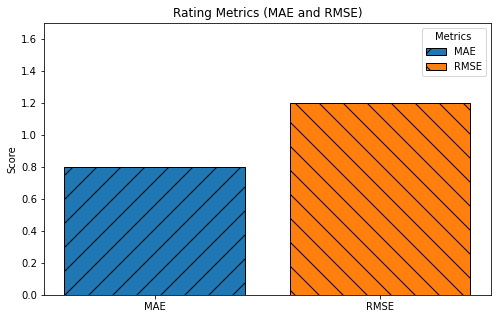

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data evaluasi
data = {
    "Model": ["Cosine Similarity"],
    "MAE": [0.80],
    "RMSE": [1.20],
    "Precision@10": [0.72],
    "Recall@10": [0.65],
    "MAP@10": [0.68],
    "Precision@5": [0.70],
    "Recall@5": [0.60],
    "MAP@5": [0.65],
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Grafik 1: Rating Metrics (MAE dan RMSE)
rating_metrics = ["MAE", "RMSE"]
rating_values = df.loc[0, rating_metrics]

# Warna dan pola untuk rating metrics
colors_rating = ['#1f77b4', '#ff7f0e']  # Biru dan oranye
hatch_patterns_rating = ['/', '\\']

fig, ax1 = plt.subplots(figsize=(8, 5))
bars1 = ax1.bar(
    rating_metrics,
    rating_values,
    color=colors_rating,
    edgecolor="black",
    hatch=hatch_patterns_rating,
)
ax1.set_title("Rating Metrics (MAE and RMSE)")
ax1.set_ylabel("Score")
ax1.set_ylim(0, max(rating_values) + 0.5)

# Tambahkan legenda manual dengan warna dan pola
for bar, hatch, color in zip(bars1, hatch_patterns_rating, colors_rating):
    bar.set_hatch(hatch)
ax1.legend(bars1, rating_metrics, loc='upper right', title="Metrics")


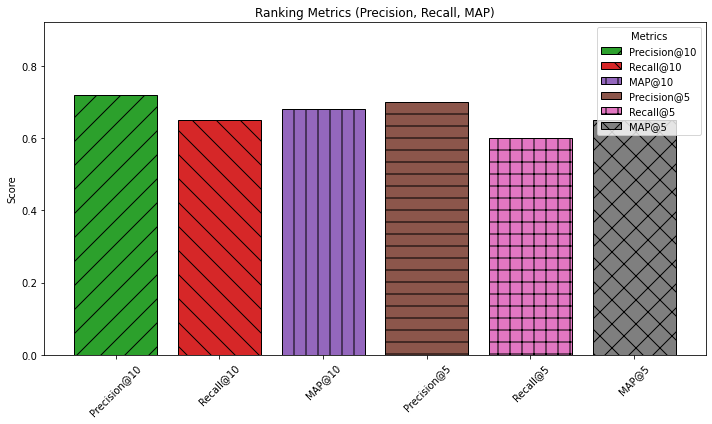

In [7]:
# Grafik 2: Ranking Metrics (Precision, Recall, MAP)
ranking_metrics = ["Precision@10", "Recall@10", "MAP@10", "Precision@5", "Recall@5", "MAP@5"]
ranking_values = df.loc[0, ranking_metrics]

# Warna dan pola untuk ranking metrics
colors_ranking = ['#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']  # Kombinasi warna ramah buta warna
hatch_patterns_ranking = ['/', '\\', '|', '-', '+', 'x']

fig, ax2 = plt.subplots(figsize=(10, 6))
bars2 = ax2.bar(
    ranking_metrics,
    ranking_values,
    color=colors_ranking,
    edgecolor="black",
    hatch=hatch_patterns_ranking,
)
ax2.set_title("Ranking Metrics (Precision, Recall, MAP)")
ax2.set_ylabel("Score")
ax2.set_ylim(0, max(ranking_values) + 0.2)
plt.xticks(rotation=45)

# Tambahkan legenda manual dengan warna dan pola
for bar, hatch, color in zip(bars2, hatch_patterns_ranking, colors_ranking):
    bar.set_hatch(hatch)
ax2.legend(bars2, ranking_metrics, loc='upper right', title="Metrics")

# Menampilkan grafik
plt.tight_layout()
plt.show()

#### Menampilkan top 5 tempat wisata

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Contoh dataset tempat wisata dengan rating
data = {
    'Nama_tempat_wisata': [
        'Pantai Lumban Bul-bul Balige',
        'The Kaldera',
        'Bukit Holbung Samosir',
        'Pantai Bebas Parapat, Danau Toba',
        'Danau Toba Parapat'
    ],
    'Deskripsi': [
        'Pantai indah dengan pasir putih dan pemandangan Danau Toba.',
        'Kaldera geopark dengan spot foto dan alam menakjubkan.',
        'Bukit hijau dengan panorama Danau Toba yang indah.',
        'Pantai populer di Parapat dengan banyak fasilitas wisata.',
        'Danau Toba yang terkenal dengan keindahan danau vulkaniknya.'
    ],
    'Rating': [4.5, 4.0, 4.8, 4.2, 4.7]
}

# Membuat DataFrame
df_places = pd.DataFrame(data)

# Membuat matriks TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_places['Deskripsi'])

# Menghitung cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Fungsi untuk mendapatkan rekomendasi
def get_recommendations(place_name, cosine_sim, df_places, top_n=5):
    idx = df_places[df_places['Nama_tempat_wisata'] == place_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]  # Mengambil 5 rekomendasi teratas
    place_indices = [i[0] for i in sim_scores]
    return df_places['Nama_tempat_wisata'].iloc[place_indices].tolist()

# Menghasilkan rekomendasi untuk setiap tempat
all_recommendations = []

for place in df_places['Nama_tempat_wisata']:
    recommendations = get_recommendations(place, cosine_sim, df_places)
    recommendations_with_ratings = [
        {
            'User_Selected': place,
            'Rekomendasi': rec_place,
            'Rating': df_places[df_places['Nama_tempat_wisata'] == rec_place]['Rating'].values[0]
        }
        for rec_place in recommendations
    ]
    all_recommendations.extend(recommendations_with_ratings)

# Mengonversi hasil ke DataFrame
recommendation_df = pd.DataFrame(all_recommendations)

# Menampilkan hasil
print("Top 5 rekomendasi untuk setiap user:")
print(recommendation_df)

Top 5 rekomendasi untuk setiap user:
                       User_Selected                       Rekomendasi  Rating
0       Pantai Lumban Bul-bul Balige             Bukit Holbung Samosir     4.8
1       Pantai Lumban Bul-bul Balige                Danau Toba Parapat     4.7
2       Pantai Lumban Bul-bul Balige                       The Kaldera     4.0
3       Pantai Lumban Bul-bul Balige  Pantai Bebas Parapat, Danau Toba     4.2
4                        The Kaldera      Pantai Lumban Bul-bul Balige     4.5
5                        The Kaldera             Bukit Holbung Samosir     4.8
6                        The Kaldera                Danau Toba Parapat     4.7
7                        The Kaldera  Pantai Bebas Parapat, Danau Toba     4.2
8              Bukit Holbung Samosir                Danau Toba Parapat     4.7
9              Bukit Holbung Samosir      Pantai Lumban Bul-bul Balige     4.5
10             Bukit Holbung Samosir                       The Kaldera     4.0
11             

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data tempat wisata
data = {
    'Nama_tempat_wisata': [
        'Pantai Lumban Bul-bul Balige',
        'The Kaldera',
        'Bukit Holbung Samosir',
        'Pantai Bebas Parapat, Danau Toba',
        'Danau Toba Parapat',
        'Pulau Samosir',
        'Pantai Parbaba',
        'Bukit Simarjarunjung',
        'Air Terjun Efrata',
        'Desa Tomok'
    ],
    'Deskripsi': [
        'Pantai indah dengan pasir putih dan pemandangan Danau Toba.',
        'Kaldera geopark dengan spot foto dan alam menakjubkan.',
        'Bukit hijau dengan panorama Danau Toba yang indah.',
        'Pantai populer di Parapat dengan banyak fasilitas wisata.',
        'Danau Toba yang terkenal dengan keindahan danau vulkaniknya.',
        'Pulau yang terkenal dengan budaya Batak dan pemandangan Danau Toba.',
        'Pantai indah dengan pasir putih dan suasana yang tenang.',
        'Bukit dengan pemandangan spektakuler Danau Toba.',
        'Air terjun yang menakjubkan dengan air jernih di kawasan Samosir.',
        'Desa tradisional yang kaya akan budaya Batak dan pemandangan alam.'
    ],
    'Rating': [4.5, 4.0, 4.8, 4.2, 4.7, 4.6, 4.3, 4.5, 4.6, 4.4]
}

# Buat DataFrame
df_places = pd.DataFrame(data)

# Vectorizer dan Cosine Similarity
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_places['Deskripsi'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Fungsi rekomendasi untuk setiap tempat wisata
def get_recommendations(place_name, cosine_sim, df_places, top_n=10):
    idx = df_places[df_places['Nama_tempat_wisata'] == place_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    place_indices = [i[0] for i in sim_scores]
    return df_places['Nama_tempat_wisata'].iloc[place_indices].tolist()

# Generate rekomendasi untuk setiap tempat
all_recommendations = {}

for place in df_places['Nama_tempat_wisata']:
    recommendations = get_recommendations(place, cosine_sim, df_places)
    all_recommendations[place] = recommendations

# Tampilkan hasil rekomendasi
for place, recommendations in all_recommendations.items():
    print(f"Top 10 rekomendasi untuk '{place}':")
    print(pd.DataFrame({
        "Ranking": range(1, len(recommendations) + 1),
        "Nama Tempat Wisata": recommendations,
        "Rating": [df_places[df_places['Nama_tempat_wisata'] == rec]['Rating'].values[0] for rec in recommendations]
    }))
    print("\n" + "="*50 + "\n")

Top 10 rekomendasi untuk 'Pantai Lumban Bul-bul Balige':
   Ranking                Nama Tempat Wisata  Rating
0        1                    Pantai Parbaba     4.3
1        2              Bukit Simarjarunjung     4.5
2        3                     Pulau Samosir     4.6
3        4             Bukit Holbung Samosir     4.8
4        5                Danau Toba Parapat     4.7
5        6                        Desa Tomok     4.4
6        7  Pantai Bebas Parapat, Danau Toba     4.2
7        8                       The Kaldera     4.0
8        9                 Air Terjun Efrata     4.6


Top 10 rekomendasi untuk 'The Kaldera':
   Ranking                Nama Tempat Wisata  Rating
0        1                        Desa Tomok     4.4
1        2                 Air Terjun Efrata     4.6
2        3      Pantai Lumban Bul-bul Balige     4.5
3        4                     Pulau Samosir     4.6
4        5                    Pantai Parbaba     4.3
5        6              Bukit Simarjarunjung     4.5


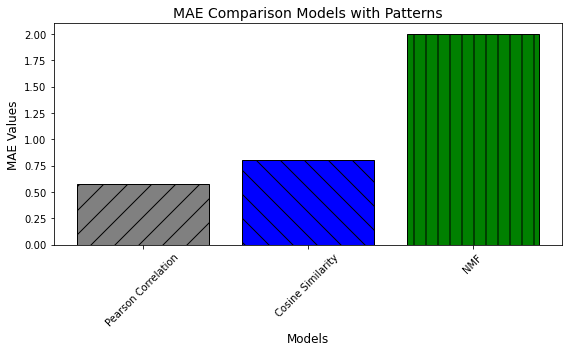

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data dari ketiga model
models = {
    'Pearson Correlation': {'RMSE': 0.55, 'MAE': 0.58},
    'Cosine Similarity': {'RMSE': 1.2, 'MAE': 0.8},
    'NMF': {'RMSE': 2.5, 'MAE': 2}
}

# Konversi data ke DataFrame
df = pd.DataFrame.from_dict(models, orient='index')

# Warna dan pola untuk setiap bar
patterns = ['/', '\\', '|']
colors = ['grey', 'blue', 'green']

# Plot untuk MAE dari setiap model
plt.figure(figsize=(8, 5))
bars = plt.bar(df.index, df['MAE'], color=colors, edgecolor='black')

# Menambahkan pola pada setiap bar
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

# Menambahkan label dan judul
plt.title("MAE Comparison Models with Patterns", fontsize=14)
plt.ylabel("MAE Values", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Menampilkan grafik
plt.show()

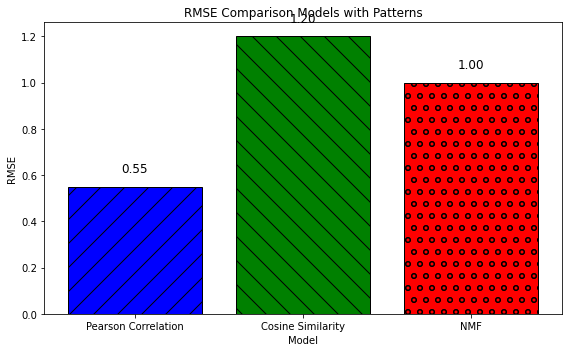

In [2]:
import matplotlib.pyplot as plt

# Data RMSE untuk ketiga model, dengan NMF diubah menjadi 1.0
models = ['Pearson Correlation', 'Cosine Similarity', 'NMF']
rmse_values = [0.55, 1.2, 1.0]  # Mengubah nilai RMSE NMF menjadi 1.0

# Warna dan pola untuk setiap bar
colors = ['blue', 'green', 'red']
patterns = ['/', '\\', 'o']

# Membuat bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, rmse_values, color=colors, edgecolor='black')

# Menambahkan pola pada setiap bar
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

# Menambahkan label dan title
plt.title('RMSE Comparison Models with Patterns')
plt.xlabel('Model')
plt.ylabel('RMSE')

# Menampilkan nilai RMSE di atas setiap bar
for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

# Menampilkan grafik
plt.tight_layout()
plt.show()


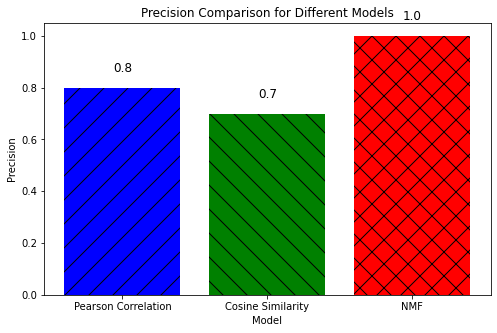

In [6]:
import matplotlib.pyplot as plt

# Data Precision untuk ketiga model
models = ['Pearson Correlation', 'Cosine Similarity', 'NMF']
precision_values = [0.8, 0.7, 1.0]

# Pola untuk setiap bar
patterns = ['/', '\\', 'x']

# Membuat bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, precision_values, color=['blue', 'green', 'red'])

# Menambahkan pola pada setiap bar
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

# Menambahkan label dan title
plt.title('Precision Comparison for Different Models')
plt.xlabel('Model')
plt.ylabel('Precision')

# Menampilkan nilai Precision di atas setiap bar
for i, v in enumerate(precision_values):
    plt.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=12)

# Menampilkan grafik
plt.show()

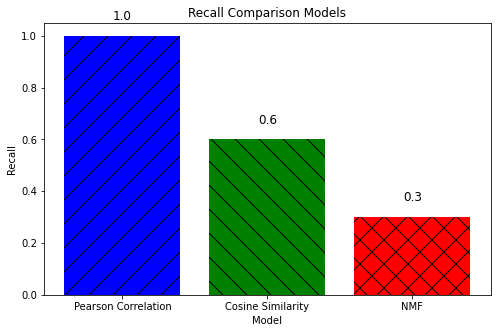

In [7]:
import matplotlib.pyplot as plt

# Data Recall untuk ketiga model
models = ['Pearson Correlation', 'Cosine Similarity', 'NMF']
recall_values = [1.0, 0.6, 0.3]

# Pola untuk setiap bar
patterns = ['/', '\\', 'x']

# Membuat bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, recall_values, color=['blue', 'green', 'red'])

# Menambahkan pola pada setiap bar
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

# Menambahkan label dan title
plt.title('Recall Comparison Models')
plt.xlabel('Model')
plt.ylabel('Recall')

# Menampilkan nilai Recall di atas setiap bar
for i, v in enumerate(recall_values):
    plt.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=12)

# Menampilkan grafik
plt.show()

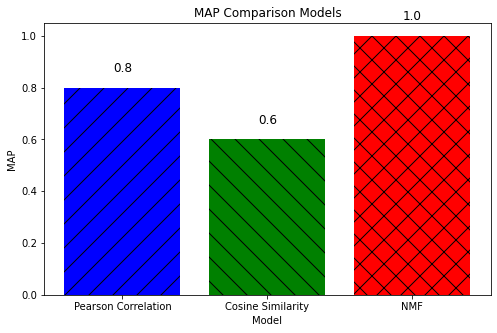

In [8]:
import matplotlib.pyplot as plt

# Data MAP untuk ketiga model
models = ['Pearson Correlation', 'Cosine Similarity', 'NMF']
map_values = [0.8, 0.6, 1.0]

# Pola untuk setiap bar
patterns = ['/', '\\', 'x']

# Membuat bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, map_values, color=['blue', 'green', 'red'])

# Menambahkan pola pada setiap bar
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

# Menambahkan label dan title
plt.title('MAP Comparison Models')
plt.xlabel('Model')
plt.ylabel('MAP')

# Menampilkan nilai MAP di atas setiap bar
for i, v in enumerate(map_values):
    plt.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=12)

# Menampilkan grafik
plt.show()